In [72]:
from sklearnex import patch_sklearn
patch_sklearn()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [73]:
tracks = pd.read_csv('music.csv', nrows=3000)
tracks.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [74]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3000 non-null   int64  
 1   artist_name               3000 non-null   object 
 2   track_name                3000 non-null   object 
 3   release_date              3000 non-null   int64  
 4   genre                     3000 non-null   object 
 5   lyrics                    3000 non-null   object 
 6   len                       3000 non-null   int64  
 7   dating                    3000 non-null   float64
 8   violence                  3000 non-null   float64
 9   world/life                3000 non-null   float64
 10  night/time                3000 non-null   float64
 11  shake the audience        3000 non-null   float64
 12  family/gospel             3000 non-null   float64
 13  romantic                  3000 non-null   float64
 14  communic

In [75]:
tracks.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

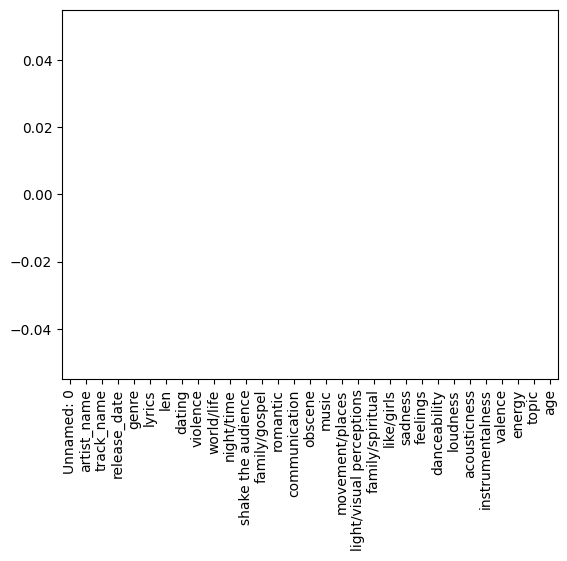

In [76]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()


In [77]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder object
encoder = LabelEncoder()
encoder.fit(tracks['artist_name'])
tracks['artist_name'] = encoder.transform(tracks['artist_name'])

# Create the LabelEncoder object
encoder = LabelEncoder()
encoder.fit(tracks['topic'])
tracks['topic'] = encoder.transform(tracks['topic'])

# Create the LabelEncoder object
# encoder = LabelEncoder()
# encoder.fit(tracks['genre'])
# tracks['genre'] = encoder.transform(tracks['genre'])


data = tracks.drop(['lyrics','track_name'], axis = 1)
data.head()

,Unnamed: 0,artist_name,release_date,genre,len,dating,violence,world/life,night/time,shake the audience,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,279,1950,pop,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,5,1.0
1,4,132,1950,pop,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,7,1.0
2,6,203,1950,pop,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1,1.0
3,10,325,1950,pop,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,4,1.0
4,12,153,1950,pop,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,4,1.0


In [78]:
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

In [79]:


# floats = []
# for col in tracks.columns:
#   if tracks[col].dtype == 'float':
#     floats.append(col)
 
# len(floats)

In [80]:
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genre'])

CountVectorizer()

In [81]:

def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['genre']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['track_name']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['track_name']==name]['genre']).toarray()
    num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [82]:
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor'],
                   ascending = [False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artist_name']][2:7])

In [85]:
recommend_songs('pulse')

,track_name,artist_name
2566,heaven,468
2570,the ghost in you,468
2595,reward,488
2638,in my world,458
2608,open your heart,440
